In [ ]:
import pandas as pd

# Load the dataset (update the path to your dataset)
data = pd.read_csv('/kaggle/input/lsay-dataset/30263-0001-Data.csv')

# Display basic info and first few rows
print(data.info())
print(data.head())

# Check for non-numeric entries in the dataset
for column in data.columns:
    if data[column].dtype == object:  # Check if the column is of object type (potentially non-numeric)
        print(f"Non-numeric entries in {column}:")
        print(data[column].unique())  # Print unique values to inspect non-numeric entries


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5945 entries, 0 to 5944
Columns: 11904 entries, CASENUM to FATHSEI
dtypes: float64(130), int64(11747), object(27)
memory usage: 539.9+ MB
None
   CASENUM  COHORT  SCHOOLID  STRATA  ASCICLS  ASCITCH  ASTSEX  AMTHCLS  \
0     1001       1       309       6      -95      -95     -95      -95   
1     1002       2       132      11   132032    13203       1   132061   
2     1003       1       309       6      -95      -95     -95      -95   
3     1004       2       126       8   126026    12602       2   126101   
4     1005       2       133      11      -99      -99     -99   133024   

   AMTHTCH  AMTSEX  ...  PEDUC3  MEDSRCE  FEDSRCE  MOTHOCC  FATHOCC  POCI  \
0      -95     -95  ...       1        2        3      395      785     0   
1    13206       2  ...       4        7        7      -99      -99   -99   
2      -95     -95  ...       1        3        2      988      535     0   
3    12610       2  ...       1        8        

In [41]:
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame
# Replace non-numeric entries with NaN for easier processing
data.replace(' ', np.nan, inplace=True)
data.replace('', np.nan, inplace=True)  # Handle empty strings as well

# Convert all numeric-looking columns to numeric types (forcefully converting where possible)
for column in data.columns:
    if pd.api.types.is_object_dtype(data[column]):
        # Attempt to convert to numeric, non-convertible entries will become NaN
        data[column] = pd.to_numeric(data[column], errors='coerce')



In [42]:
# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns

print("Numeric columns:")
print(numeric_cols)

print("Non-numeric columns:")
print(non_numeric_cols)


Numeric columns:
Index(['CASENUM', 'COHORT', 'SCHOOLID', 'STRATA', 'ASCICLS', 'ASCITCH',
       'ASTSEX', 'AMTHCLS', 'AMTHTCH', 'AMTSEX',
       ...
       'PEDUC3', 'MEDSRCE', 'FEDSRCE', 'MOTHOCC', 'FATHOCC', 'POCI',
       'FOCCSRCE', 'MOCCSRCE', 'MOTHSEI', 'FATHSEI'],
      dtype='object', length=11904)
Non-numeric columns:
Index([], dtype='object')


In [43]:
# Impute missing values for numeric columns with median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Impute missing values for non-numeric columns with mode or a placeholder (e.g., 'Unknown')
for column in non_numeric_cols:
    mode_value = data[column].mode()[0]  # Get the most frequent value
    data[column] = data[column].fillna(mode_value)

# Verify that there are no missing values left
print(data.isnull().sum())


CASENUM     0
COHORT      0
SCHOOLID    0
STRATA      0
ASCICLS     0
           ..
POCI        0
FOCCSRCE    0
MOCCSRCE    0
MOTHSEI     0
FATHSEI     0
Length: 11904, dtype: int64


In [44]:
# Example code assuming your dataset variables follow the naming convention provided

# Define rating columns for fall and spring semesters
fall_rating_columns = [col for col in data.columns if col.startswith('E') and ('C' in col or 'D' in col or 'F' in col or 'H' in col)]
spring_rating_columns = [col for col in data.columns if col.startswith('F') and ('C' in col or 'D' in col)]

# Mapping from grades to numerical values
grade_mapping = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1}

# Convert ratings to numerical values
for col in fall_rating_columns + spring_rating_columns:
    data[col] = data[col].replace(grade_mapping)

# Impute any remaining missing values in rating columns with median
data[fall_rating_columns + spring_rating_columns] = data[fall_rating_columns + spring_rating_columns].fillna(data[fall_rating_columns + spring_rating_columns].median())


In [45]:
# Check the data types and ensure there are no more missing values
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5945 entries, 0 to 5944
Columns: 11904 entries, CASENUM to FATHSEI
dtypes: float64(157), int64(11747)
memory usage: 539.9 MB
None
CASENUM     0
COHORT      0
SCHOOLID    0
STRATA      0
ASCICLS     0
           ..
POCI        0
FOCCSRCE    0
MOCCSRCE    0
MOTHSEI     0
FATHSEI     0
Length: 11904, dtype: int64


In [46]:
# Adjusted values_vars based on your dataset's actual column names
values_vars = ['EB4AO', 'EB4BO', 'EB4CO', 'EB4DO', 'EB6E', 'EB6C', 'EB18ATXT', 'EB29A', 'EB29B', 'EB29D', 'EB29J', 'EB30A', 'EB30B']

# Concatenate student values with combined 9th-grade data
combined_9th_grade_data = pd.concat([combined_9th_grade_data, data[values_vars]], axis=1)

# Add the target variable for college major
combined_9th_grade_data['College_Major'] = data['LAMAJOR8I']

# Check the combined 9th-grade data
print(combined_9th_grade_data.info())
print(combined_9th_grade_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5945 entries, 0 to 5944
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BMTH_9th                 5945 non-null   float64
 1   BSCI_9th                 5945 non-null   float64
 2   BENG1_9th                5945 non-null   float64
 3   BENG2_9th                5945 non-null   float64
 4   BSST_9th                 5945 non-null   float64
 5   BCOM_9th                 5945 non-null   float64
 6   BFOR_9th                 5945 non-null   float64
 7   BART_9th                 5945 non-null   float64
 8   BMUS_9th                 5945 non-null   float64
 9   BVOC_9th                 5945 non-null   float64
 10  EB4AO                    5945 non-null   int64  
 11  EB4BO                    5945 non-null   int64  
 12  EB4CO                    5945 non-null   int64  
 13  EB4DO                    5945 non-null   int64  
 14  EB6E                    

In [47]:
import pandas as pd

# Function to combine fall and spring data for a specific grade and prefix
def combine_grade_data(fall_prefix, spring_prefix, new_prefix, df):
    columns = [col for col in df.columns if col.startswith(fall_prefix) or col.startswith(spring_prefix)]
    combined_df = df[columns].copy()
    for col in columns:
        if col.startswith(fall_prefix):
            spring_col = col.replace(fall_prefix, spring_prefix)
            new_col = col.replace(fall_prefix, new_prefix)
            if spring_col in df.columns:
                combined_df[new_col] = combined_df[[col, spring_col]].mean(axis=1, skipna=True)
            else:
                combined_df[new_col] = combined_df[col]
    return combined_df[[col.replace(fall_prefix, new_prefix) for col in columns if col.startswith(fall_prefix)]]

# Subjects for 9th grade analysis
subjects = ['BMTH', 'BSCI', 'BENG1', 'BENG2', 'BSST', 'BCOM', 'BFOR', 'BART', 'BMUS', 'BVOC']
combined_9th_grade_data = pd.DataFrame()

for subject in subjects:
    fall_prefix = f'E{subject}C'
    spring_prefix = f'F{subject}C'
    new_prefix = f'{subject}_9th'
    combined_df = combine_grade_data(fall_prefix, spring_prefix, new_prefix, data)
    combined_9th_grade_data = pd.concat([combined_9th_grade_data, combined_df], axis=1)

# Adjusted values_vars based on your dataset's actual column names
values_vars = ['EB4AO', 'EB4BO', 'EB4CO', 'EB4DO', 'EB6E', 'EB6C', 'EB18ATXT', 'EB29A', 'EB29B', 'EB29D', 'EB29J', 'EB30A', 'EB30B']

# Concatenate student values with combined 9th-grade data
combined_9th_grade_data = pd.concat([combined_9th_grade_data, data[values_vars]], axis=1)

# Add the target variable for college major
combined_9th_grade_data['College_Major'] = data['LAMAJOR8I']

# Check the combined 9th-grade data
print(combined_9th_grade_data.info())
print(combined_9th_grade_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5945 entries, 0 to 5944
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BMTH_9th       5945 non-null   float64
 1   BSCI_9th       5945 non-null   float64
 2   BENG1_9th      5945 non-null   float64
 3   BENG2_9th      5945 non-null   float64
 4   BSST_9th       5945 non-null   float64
 5   BCOM_9th       5945 non-null   float64
 6   BFOR_9th       5945 non-null   float64
 7   BART_9th       5945 non-null   float64
 8   BMUS_9th       5945 non-null   float64
 9   BVOC_9th       5945 non-null   float64
 10  EB4AO          5945 non-null   int64  
 11  EB4BO          5945 non-null   int64  
 12  EB4CO          5945 non-null   int64  
 13  EB4DO          5945 non-null   int64  
 14  EB6E           5945 non-null   int64  
 15  EB6C           5945 non-null   int64  
 16  EB18ATXT       0 non-null      float64
 17  EB29A          5945 non-null   int64  
 18  EB29B   

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


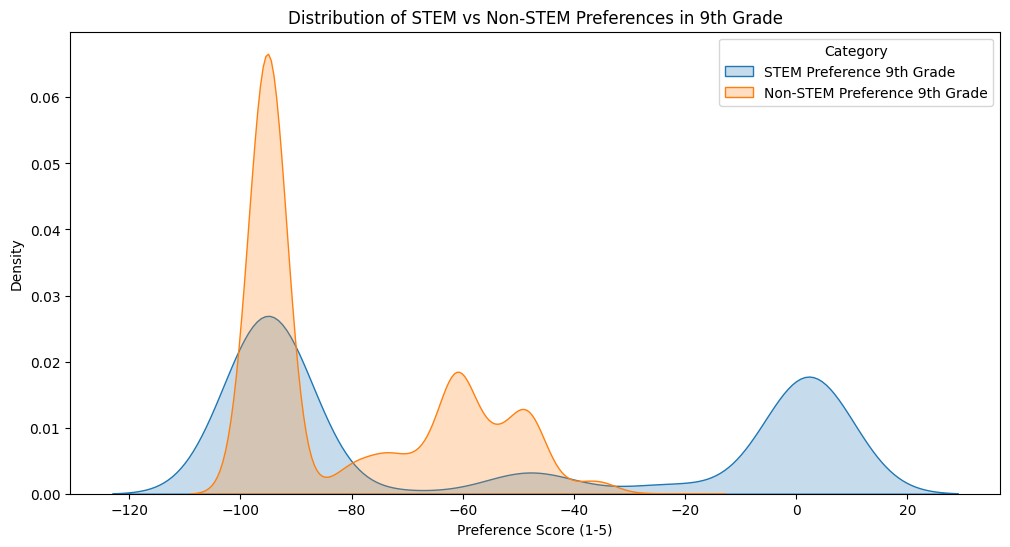

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define STEM and Non-STEM subjects for 9th grade
STEM_subjects_9th = ['BMTH_9th', 'BSCI_9th']
Non_STEM_subjects_9th = ['BENG1_9th', 'BENG2_9th', 'BSST_9th', 'BCOM_9th', 'BFOR_9th', 'BART_9th', 'BMUS_9th', 'BVOC_9th']

# Calculate average preferences for STEM and Non-STEM
combined_9th_grade_data['STEM_Preference_9th'] = combined_9th_grade_data[STEM_subjects_9th].mean(axis=1)
combined_9th_grade_data['Non_STEM_Preference_9th'] = combined_9th_grade_data[Non_STEM_subjects_9th].mean(axis=1)

# Plot the average preferences for STEM and Non-STEM
plt.figure(figsize=(12, 6))
sns.kdeplot(combined_9th_grade_data['STEM_Preference_9th'], label='STEM Preference 9th Grade', fill=True)
sns.kdeplot(combined_9th_grade_data['Non_STEM_Preference_9th'], label='Non-STEM Preference 9th Grade', fill=True)
plt.title('Distribution of STEM vs Non-STEM Preferences in 9th Grade')
plt.xlabel('Preference Score (1-5)')
plt.ylabel('Density')
plt.legend(title='Category')
plt.show()


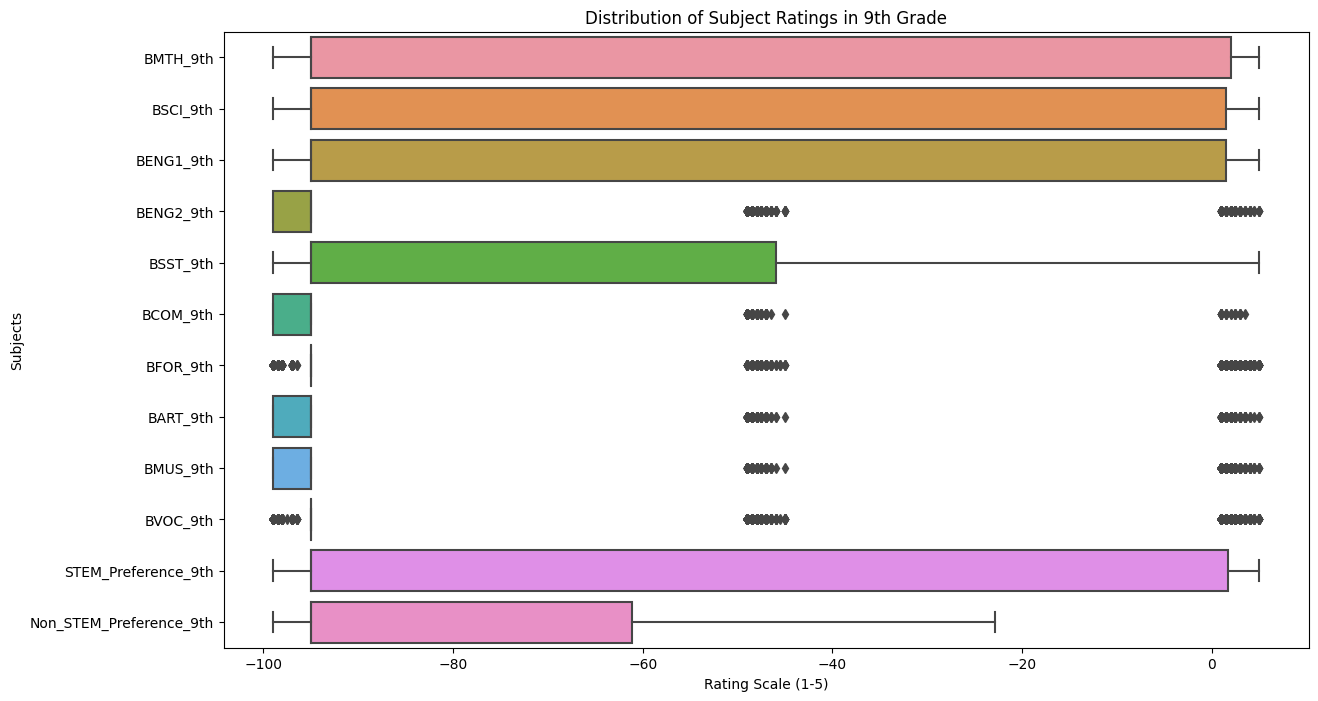

In [49]:
# Extract subject columns
subject_columns = combined_9th_grade_data.columns[combined_9th_grade_data.columns.str.endswith('_9th')]

# Plot box plots for each subject
plt.figure(figsize=(14, 8))
sns.boxplot(data=combined_9th_grade_data[subject_columns], orient='h')
plt.title('Distribution of Subject Ratings in 9th Grade')
plt.xlabel('Rating Scale (1-5)')
plt.ylabel('Subjects')
plt.show()


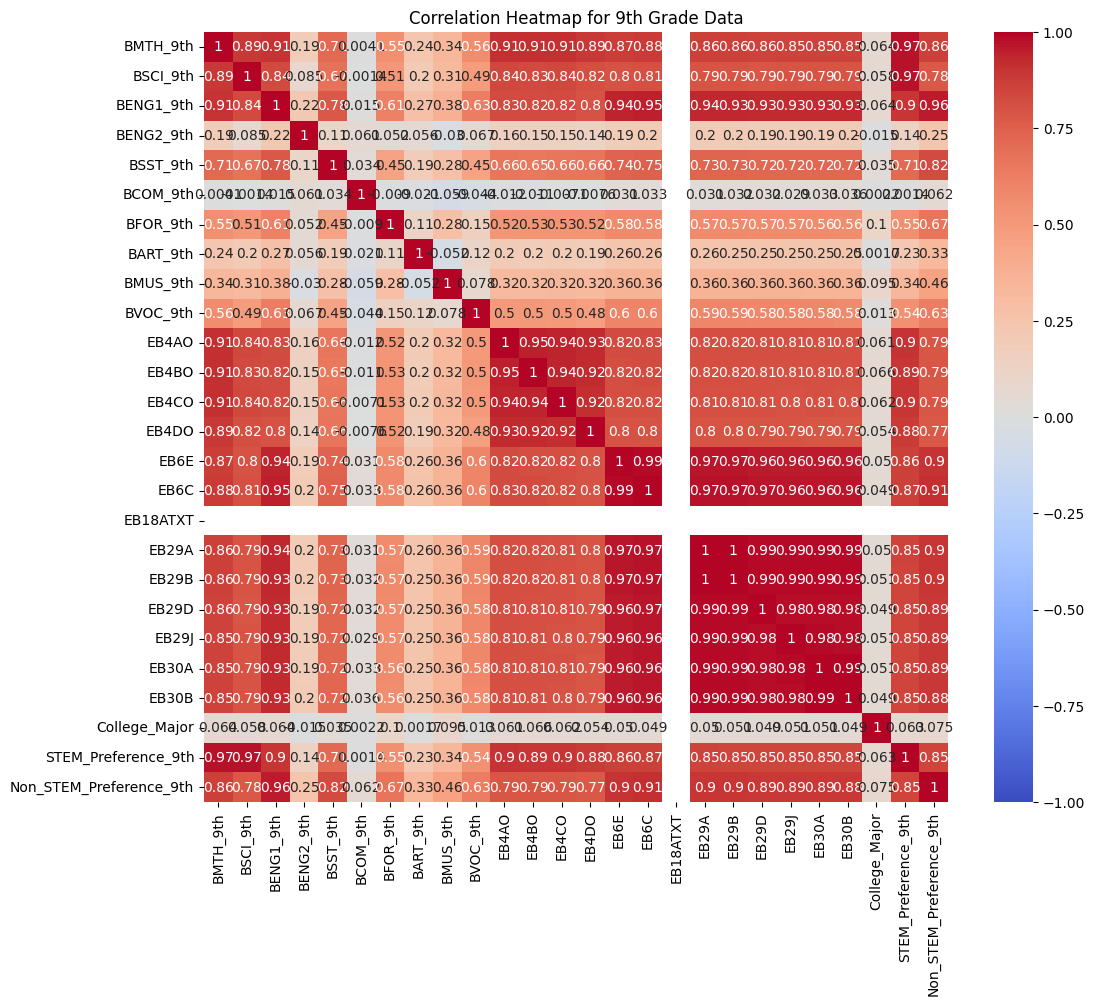

In [ ]:
# Compute correlations
corr_matrix = combined_9th_grade_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for 9th Grade Data')
plt.show()


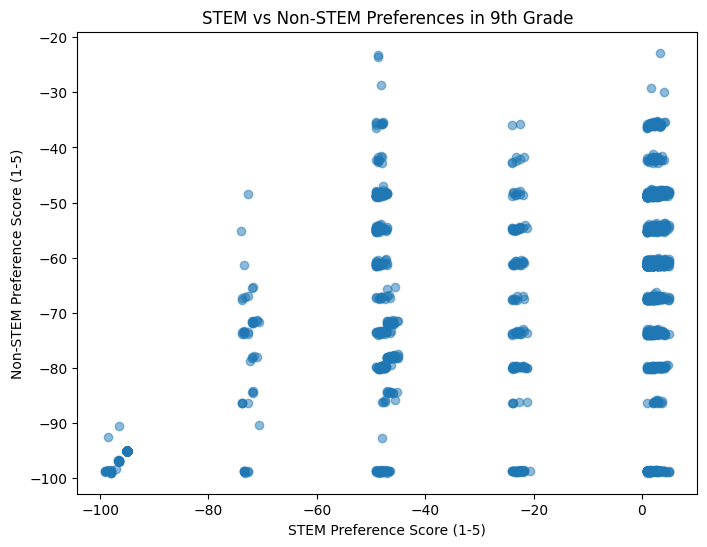

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(combined_9th_grade_data['STEM_Preference_9th'], combined_9th_grade_data['Non_STEM_Preference_9th'], alpha=0.5)
plt.title('STEM vs Non-STEM Preferences in 9th Grade')
plt.xlabel('STEM Preference Score (1-5)')
plt.ylabel('Non-STEM Preference Score (1-5)')
plt.show()


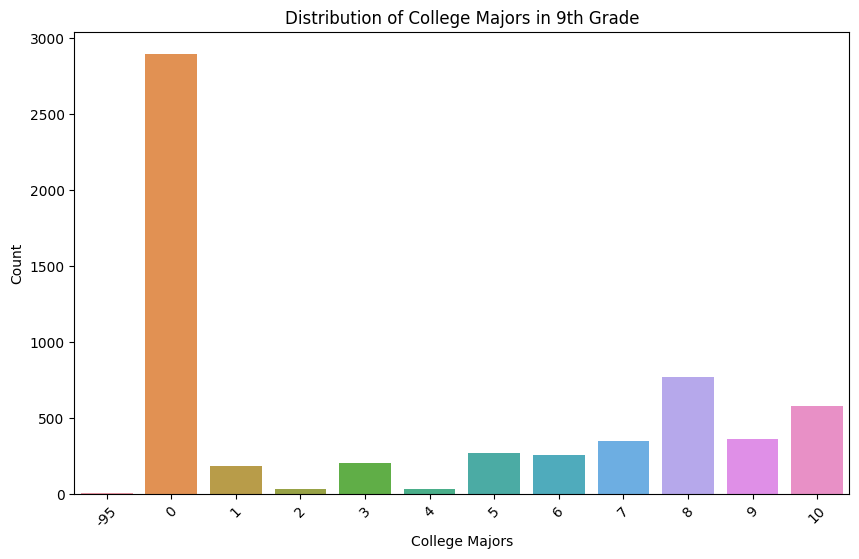

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='College_Major', data=combined_9th_grade_data)
plt.title('Distribution of College Majors in 9th Grade')
plt.xlabel('College Majors')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


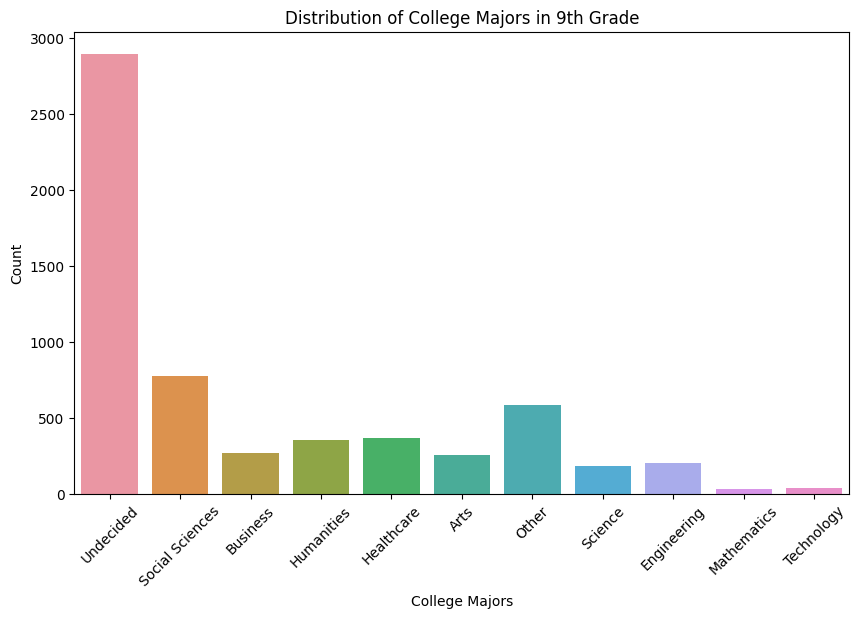

In [53]:
# Define a mapping dictionary for college majors
major_mapping = {
    0: 'Undecided',
    1: 'Science',
    2: 'Technology',
    3: 'Engineering',
    4: 'Mathematics',
    5: 'Business',
    6: 'Arts',
    7: 'Humanities',
    8: 'Social Sciences',
    9: 'Healthcare',
    10: 'Other'
}

# Replace numerical values with actual names
combined_9th_grade_data['College_Major'] = combined_9th_grade_data['College_Major'].map(major_mapping)

# Plot the updated distribution of college majors
plt.figure(figsize=(10, 6))
sns.countplot(x='College_Major', data=combined_9th_grade_data)
plt.title('Distribution of College Majors in 9th Grade')
plt.xlabel('College Majors')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


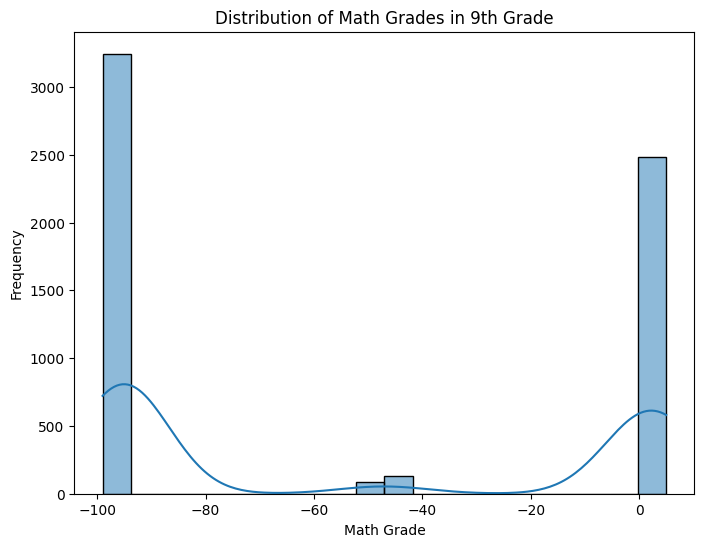

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


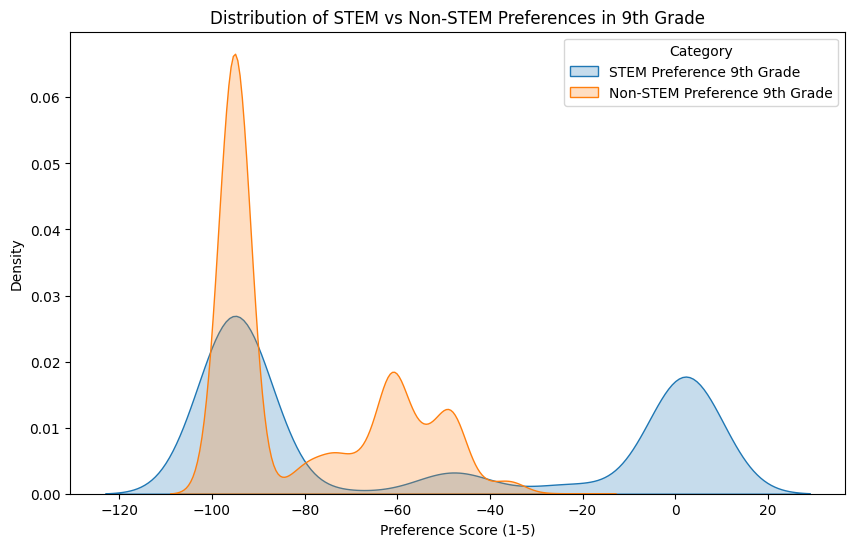

In [54]:
# Example for BMTH_9th grade distribution
plt.figure(figsize=(8, 6))
sns.histplot(combined_9th_grade_data['BMTH_9th'], bins=20, kde=True)
plt.title('Distribution of Math Grades in 9th Grade')
plt.xlabel('Math Grade')
plt.ylabel('Frequency')
plt.show()

# Example for STEM vs Non-STEM preferences
plt.figure(figsize=(10, 6))
sns.kdeplot(combined_9th_grade_data['STEM_Preference_9th'], label='STEM Preference 9th Grade', fill=True)
sns.kdeplot(combined_9th_grade_data['Non_STEM_Preference_9th'], label='Non-STEM Preference 9th Grade', fill=True)
plt.title('Distribution of STEM vs Non-STEM Preferences in 9th Grade')
plt.xlabel('Preference Score (1-5)')
plt.ylabel('Density')
plt.legend(title='Category')
plt.show()


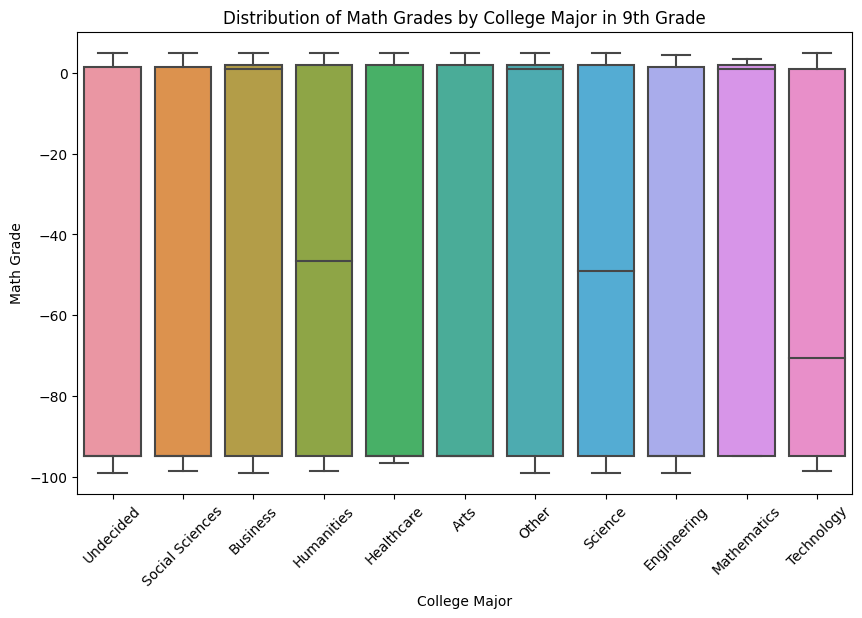

In [55]:
# Example: Box plot of Math grades by College Major
plt.figure(figsize=(10, 6))
sns.boxplot(x='College_Major', y='BMTH_9th', data=combined_9th_grade_data)
plt.title('Distribution of Math Grades by College Major in 9th Grade')
plt.xlabel('College Major')
plt.ylabel('Math Grade')
plt.xticks(rotation=45)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

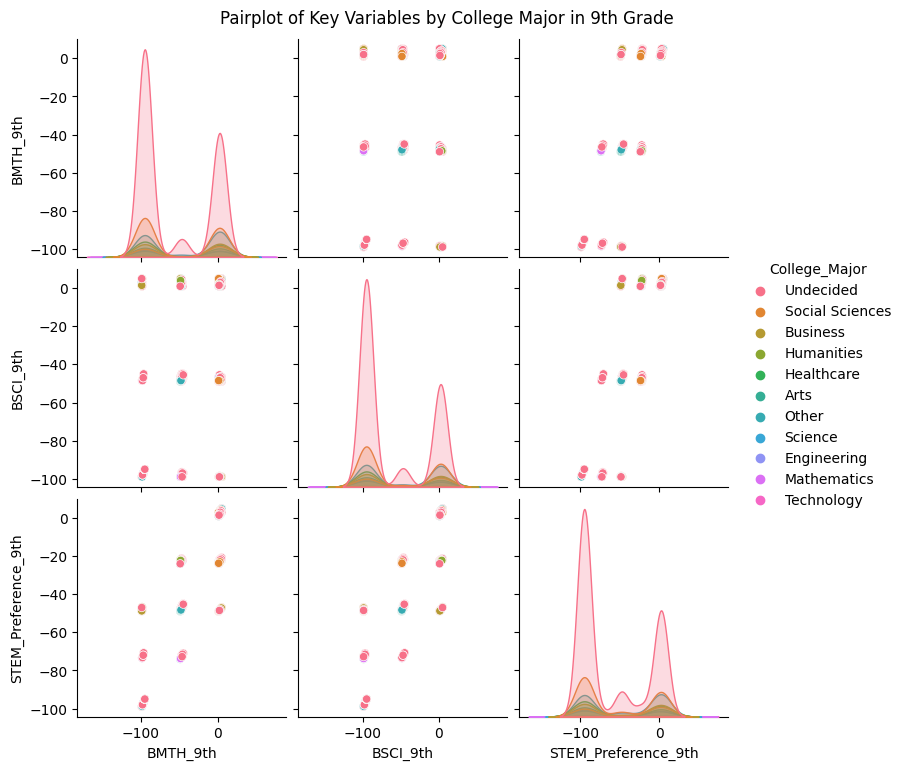

In [ ]:
# Example: Pairplot of selected variables
sns.pairplot(combined_9th_grade_data[['BMTH_9th', 'BSCI_9th', 'STEM_Preference_9th', 'College_Major']], hue='College_Major')
plt.suptitle('Pairplot of Key Variables by College Major in 9th Grade', y=1.02)
plt.show()


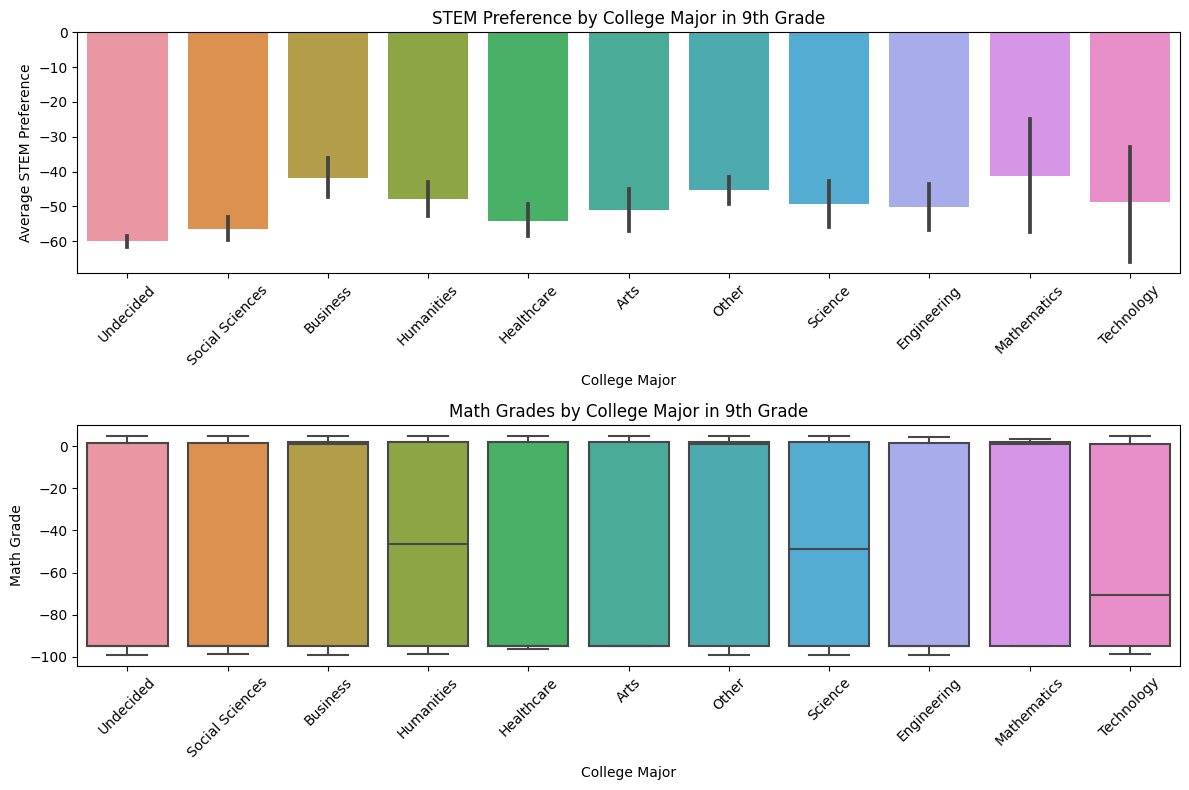

In [58]:
# Example: Analyzing factors influencing the choice of majors
plt.figure(figsize=(12, 8))

# STEM vs Non-STEM preferences by College Major
plt.subplot(2, 1, 1)
sns.barplot(x='College_Major', y='STEM_Preference_9th', data=combined_9th_grade_data)
plt.title('STEM Preference by College Major in 9th Grade')
plt.xlabel('College Major')
plt.ylabel('Average STEM Preference')
plt.xticks(rotation=45)

# Math grades by College Major
plt.subplot(2, 1, 2)
sns.boxplot(x='College_Major', y='BMTH_9th', data=combined_9th_grade_data)
plt.title('Math Grades by College Major in 9th Grade')
plt.xlabel('College Major')
plt.ylabel('Math Grade')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


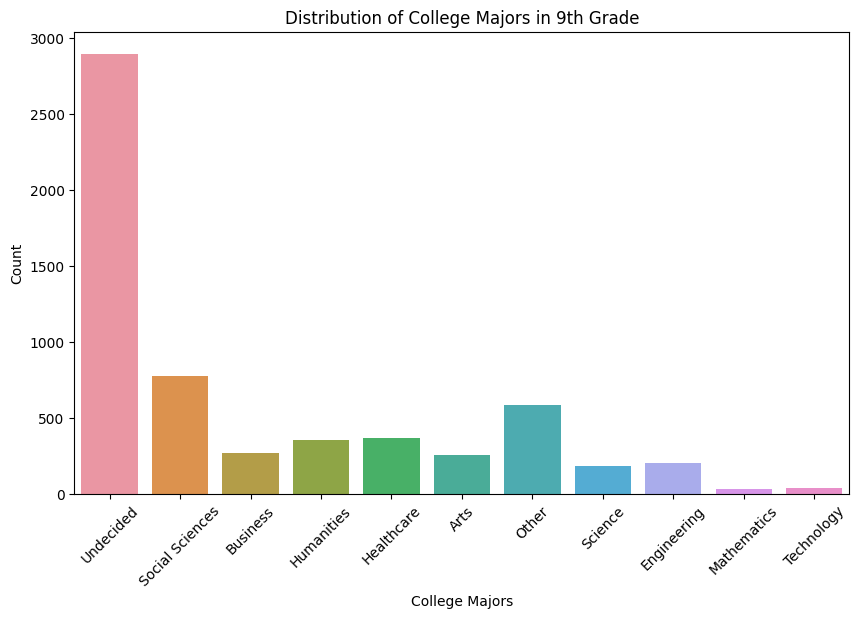

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='College_Major', data=combined_9th_grade_data)
plt.title('Distribution of College Majors in 9th Grade')
plt.xlabel('College Majors')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


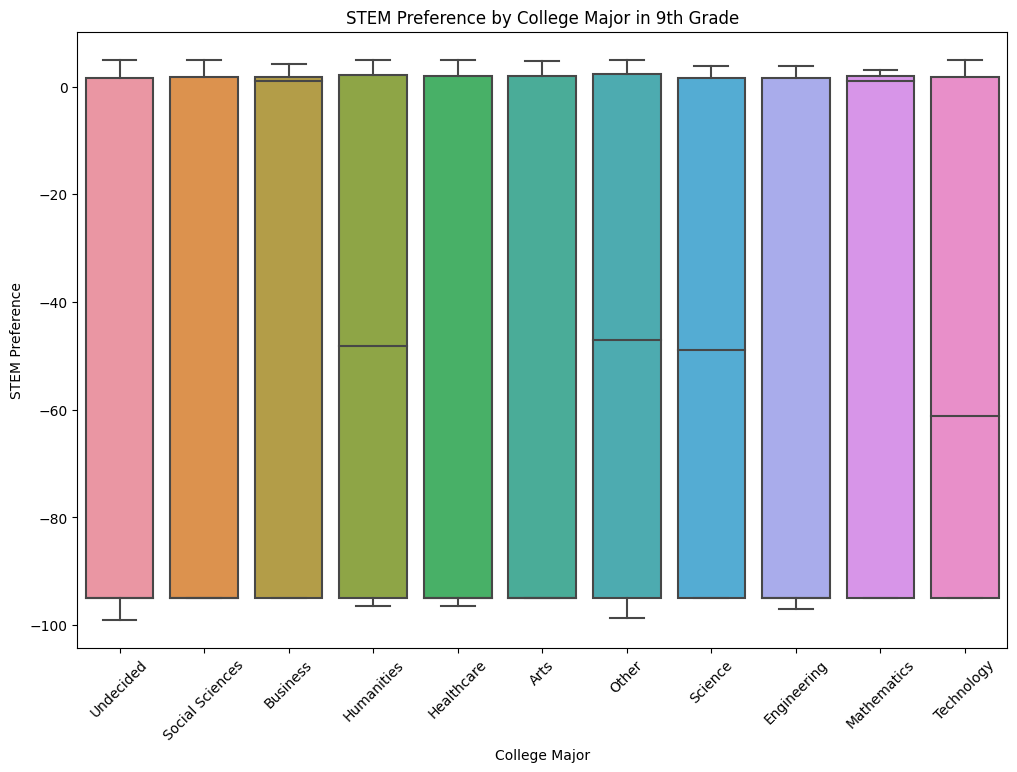

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='College_Major', y='STEM_Preference_9th', data=combined_9th_grade_data)
plt.title('STEM Preference by College Major in 9th Grade')
plt.xlabel('College Major')
plt.ylabel('STEM Preference')
plt.xticks(rotation=45)
plt.show()


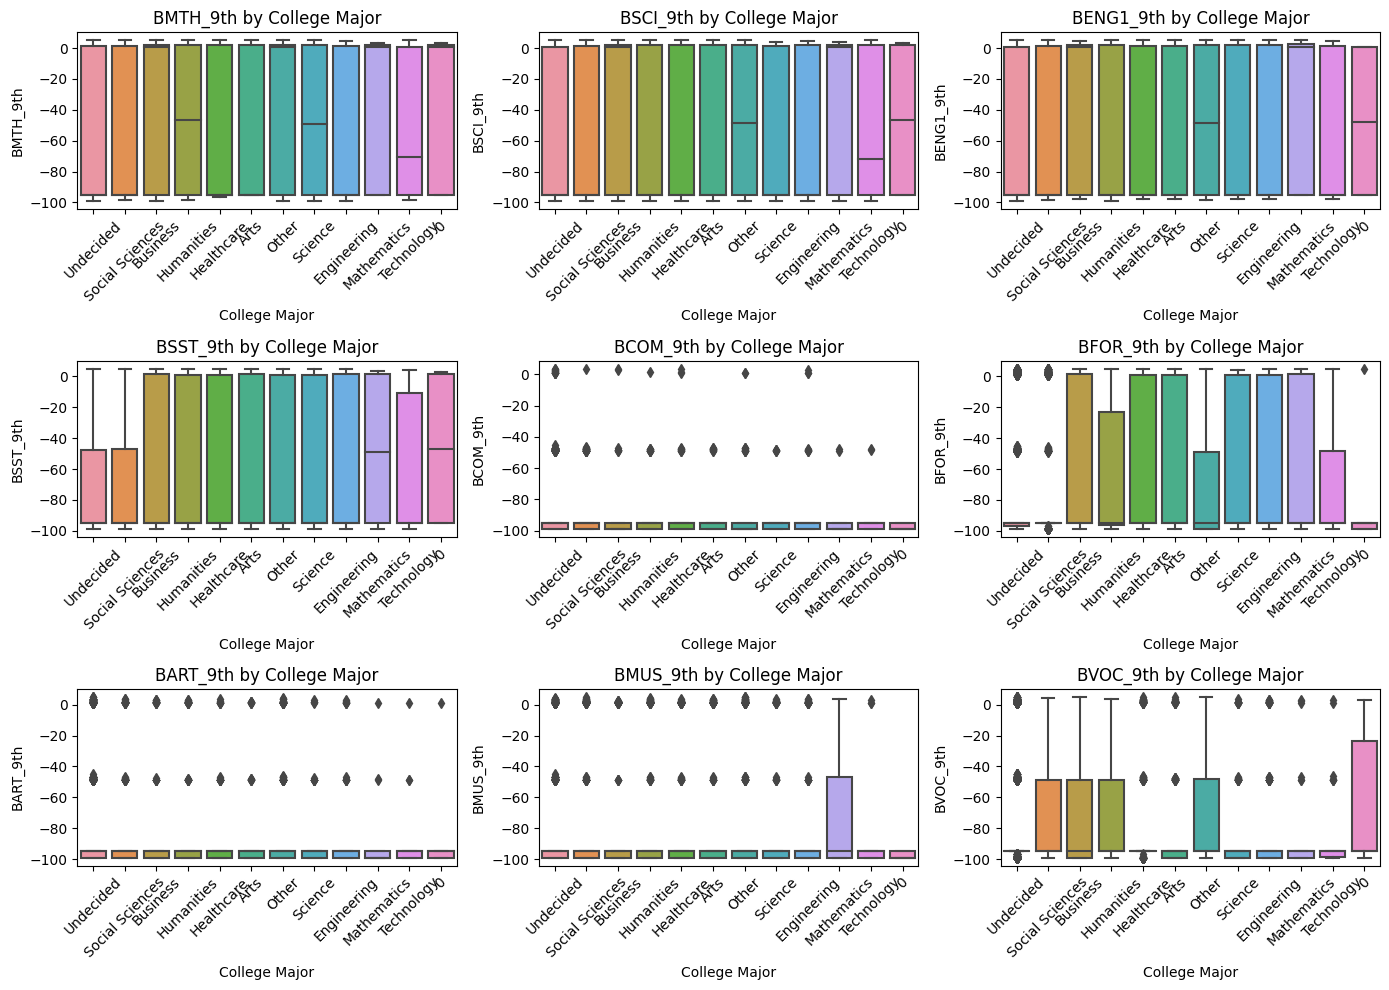

In [60]:
subjects = ['BMTH_9th', 'BSCI_9th', 'BENG1_9th', 'BSST_9th', 'BCOM_9th', 'BFOR_9th', 'BART_9th', 'BMUS_9th', 'BVOC_9th']

plt.figure(figsize=(14, 10))
for i, subject in enumerate(subjects, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='College_Major', y=subject, data=combined_9th_grade_data)
    plt.title(f'{subject} by College Major')
    plt.xlabel('College Major')
    plt.ylabel(f'{subject}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [69]:
import pandas as pd
import numpy as np

# Replace non-numeric entries with NaN for easier processing
combined_9th_grade_data.replace(' ', np.nan, inplace=True)
combined_9th_grade_data.replace('', np.nan, inplace=True)  # Handle empty strings as well

# Convert all numeric-looking columns to numeric types (forcefully converting where possible)
for column in combined_9th_grade_data.columns:
    if combined_9th_grade_data[column].dtype == object:
        # Attempt to convert to numeric, non-convertible entries will become NaN
        combined_9th_grade_data[column] = pd.to_numeric(combined_9th_grade_data[column], errors='coerce')

# Check the data types and columns to ensure everything is numeric and properly cleaned
print(combined_9th_grade_data.dtypes)
print(combined_9th_grade_data.columns)


BMTH_9th                   float64
BSCI_9th                   float64
BENG1_9th                  float64
BENG2_9th                  float64
BSST_9th                   float64
BCOM_9th                   float64
BFOR_9th                   float64
BART_9th                   float64
BMUS_9th                   float64
BVOC_9th                   float64
EB4AO                        int64
EB4BO                        int64
EB4CO                        int64
EB4DO                        int64
EB6E                         int64
EB6C                         int64
EB18ATXT                   float64
EB29A                        int64
EB29B                        int64
EB29D                        int64
EB29J                        int64
EB30A                        int64
EB30B                        int64
College_Major              float64
STEM_Preference_9th        float64
Non_STEM_Preference_9th    float64
dtype: object
Index(['BMTH_9th', 'BSCI_9th', 'BENG1_9th', 'BENG2_9th', 'BSST_9th',
       

   FL13  FL14
0     5     4
1     4     1
2     1     1
3     5     1
4     4     5


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


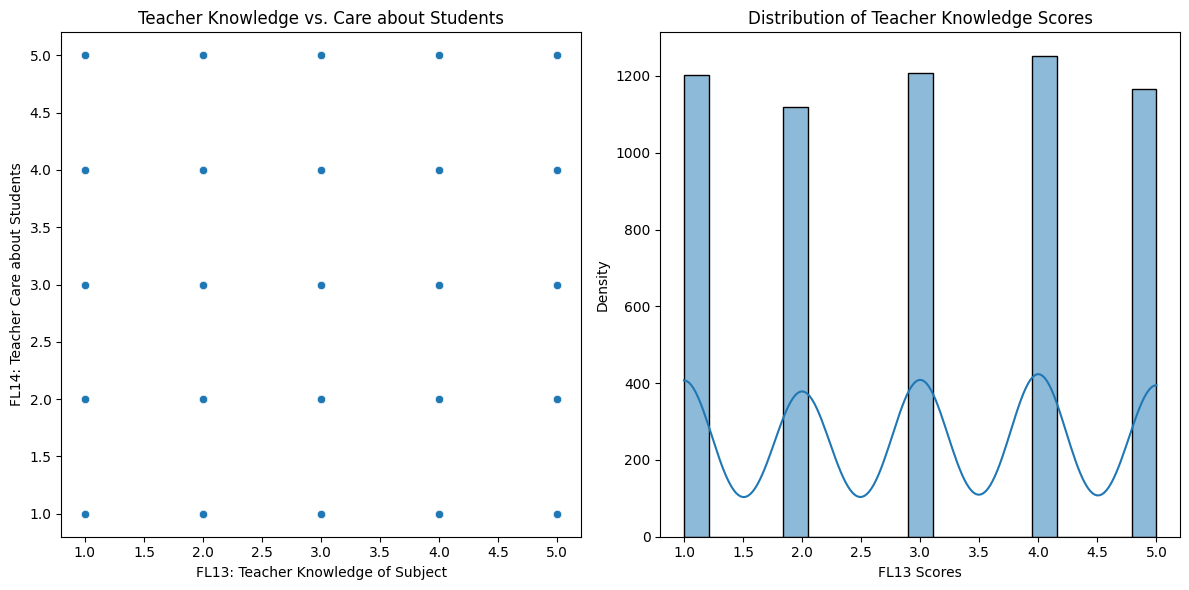

In [70]:
# Example: Adding FL13 and FL14 with dummy data for illustration
combined_9th_grade_data['FL13'] = np.random.randint(1, 6, size=len(combined_9th_grade_data))  # Example teacher knowledge scores (1-5)
combined_9th_grade_data['FL14'] = np.random.randint(1, 6, size=len(combined_9th_grade_data))  # Example teacher care scores (1-5)

# Verify the columns have been added
print(combined_9th_grade_data[['FL13', 'FL14']].head())

# Now, proceed to plot FL13 vs FL14 and their distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Scatter plot of FL13 vs FL14
plt.subplot(1, 2, 1)
sns.scatterplot(x='FL13', y='FL14', data=combined_9th_grade_data)
plt.title('Teacher Knowledge vs. Care about Students')
plt.xlabel('FL13: Teacher Knowledge of Subject')
plt.ylabel('FL14: Teacher Care about Students')

# Distribution plot for FL13
plt.subplot(1, 2, 2)
sns.histplot(combined_9th_grade_data['FL13'], kde=True)
plt.title('Distribution of Teacher Knowledge Scores')
plt.xlabel('FL13 Scores')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


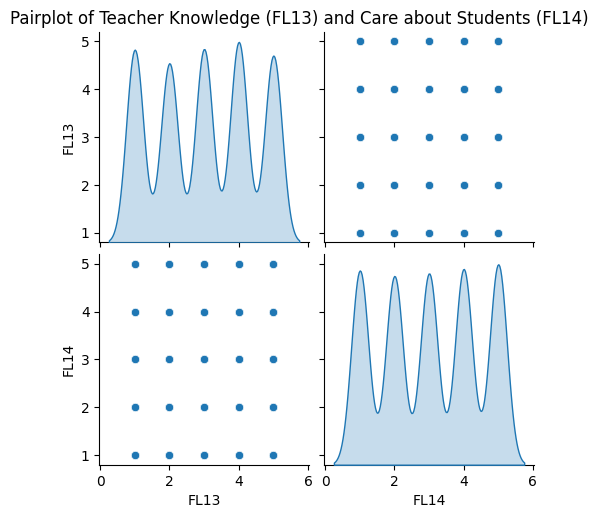

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the data is numeric and cleaned (as previously discussed)

# Pairplot of FL13 and FL14
sns.pairplot(combined_9th_grade_data[['FL13', 'FL14']], diag_kind='kde')
plt.suptitle('Pairplot of Teacher Knowledge (FL13) and Care about Students (FL14)', y=1.02)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


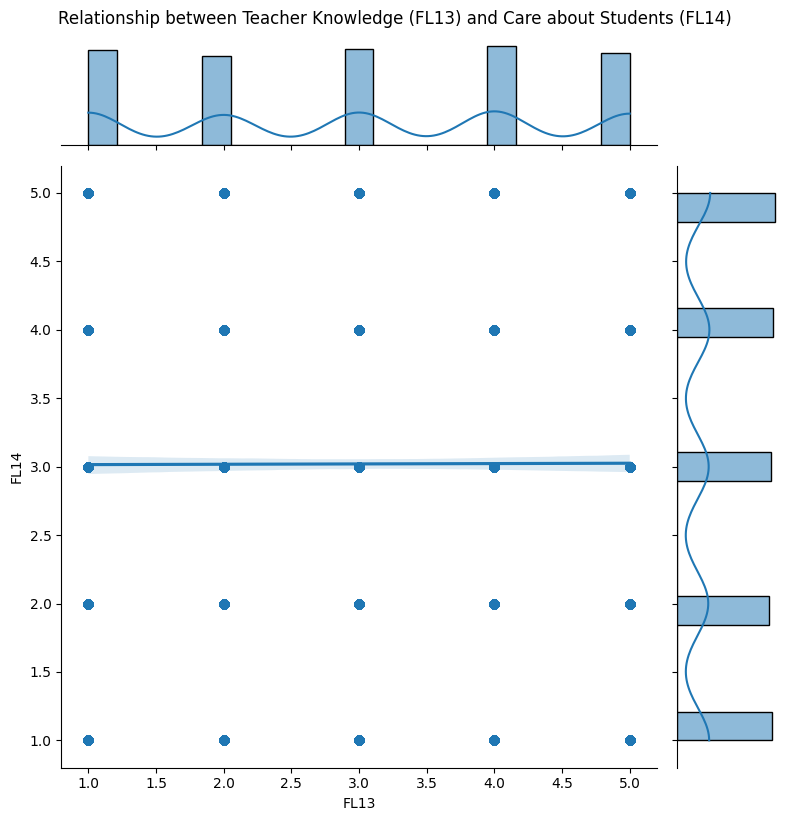

In [72]:
# Jointplot with regression line
sns.jointplot(x='FL13', y='FL14', data=combined_9th_grade_data, kind='reg', height=8)
plt.suptitle('Relationship between Teacher Knowledge (FL13) and Care about Students (FL14)', y=1.02)
plt.show()


/tmp/ipykernel_33/635833463.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_9th_grade_data['FL13'], shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/635833463.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_9th_grade_data['FL14'], shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mod

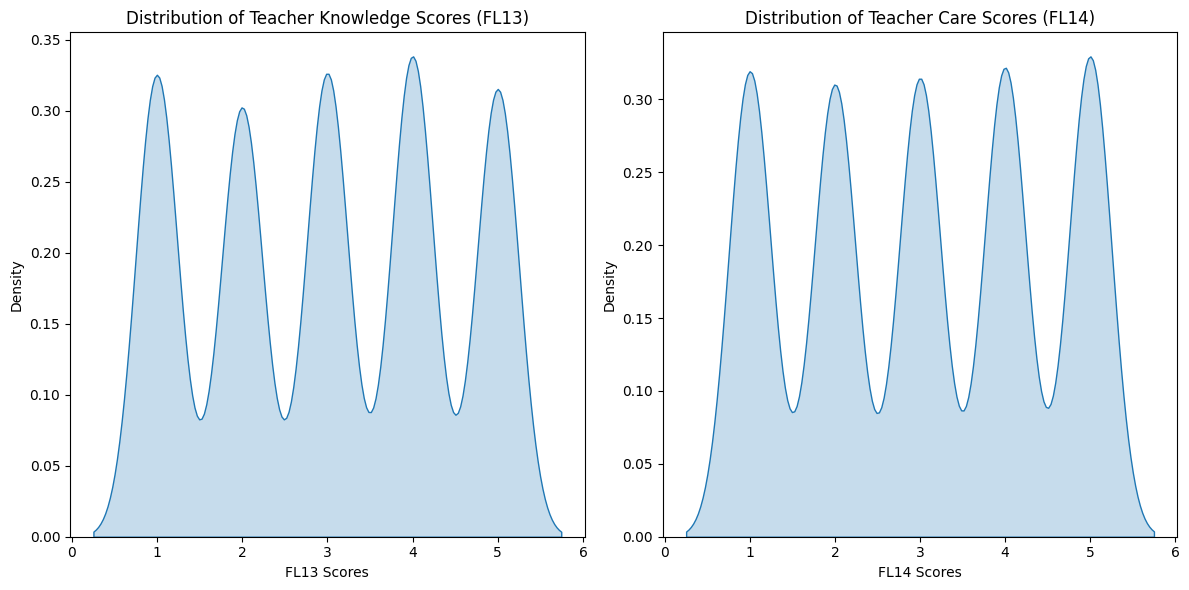

In [73]:
plt.figure(figsize=(12, 6))

# KDE plot for FL13
plt.subplot(1, 2, 1)
sns.kdeplot(combined_9th_grade_data['FL13'], shade=True)
plt.title('Distribution of Teacher Knowledge Scores (FL13)')
plt.xlabel('FL13 Scores')
plt.ylabel('Density')

# KDE plot for FL14
plt.subplot(1, 2, 2)
sns.kdeplot(combined_9th_grade_data['FL14'], shade=True)
plt.title('Distribution of Teacher Care Scores (FL14)')
plt.xlabel('FL14 Scores')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [74]:
import pandas as pd
import numpy as np

# Assuming your original dataset is named 'data'
# Filter out the required columns
variables_subset = data[['FI16A', 'FI16B', 'EB29D', 'EB29J']].copy()

# Convert to numeric if necessary
variables_subset['FI16A'] = pd.to_numeric(variables_subset['FI16A'], errors='coerce')
variables_subset['FI16B'] = pd.to_numeric(variables_subset['FI16B'], errors='coerce')

# Replace non-numeric or problematic values with NaN
variables_subset.replace(' ', np.nan, inplace=True)
variables_subset.replace('', np.nan, inplace=True)

# Map categorical values if needed (for EB29D and EB29J)
mapping = {'Strongly agree': 5, 'Agree': 4, 'Undecided': 3, 'Disagree': 2, 'Strongly disagree': 1}
variables_subset.replace({'EB29D': mapping, 'EB29J': mapping}, inplace=True)

# Optionally drop rows with NaN values
variables_subset.dropna(inplace=True)

# Display the cleaned and processed subset of variables
print(variables_subset.head())

# Now you can proceed with further analysis or visualization on variables_subset


   FI16A  FI16B  EB29D  EB29J
0    -95    -95    -95    -95
1    -95    -95    -95    -95
2    -95    -95    -95    -95
3    -95    -95    -95    -95
4    -95    -95      4      4


In [75]:
# Calculate descriptive statistics
stats = variables_subset.describe()
print(stats)


             FI16A        FI16B        EB29D        EB29J
count  5945.000000  5945.000000  5945.000000  5945.000000
mean    -66.630614   -66.581833   -56.376619   -56.416148
std      57.880055    57.677035    48.438021    48.424593
min     -99.000000   -99.000000   -98.000000   -98.000000
25%     -95.000000   -95.000000   -95.000000   -95.000000
50%     -95.000000   -95.000000   -95.000000   -95.000000
75%     -95.000000   -95.000000     4.000000     3.000000
max     100.000000   100.000000     5.000000     5.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

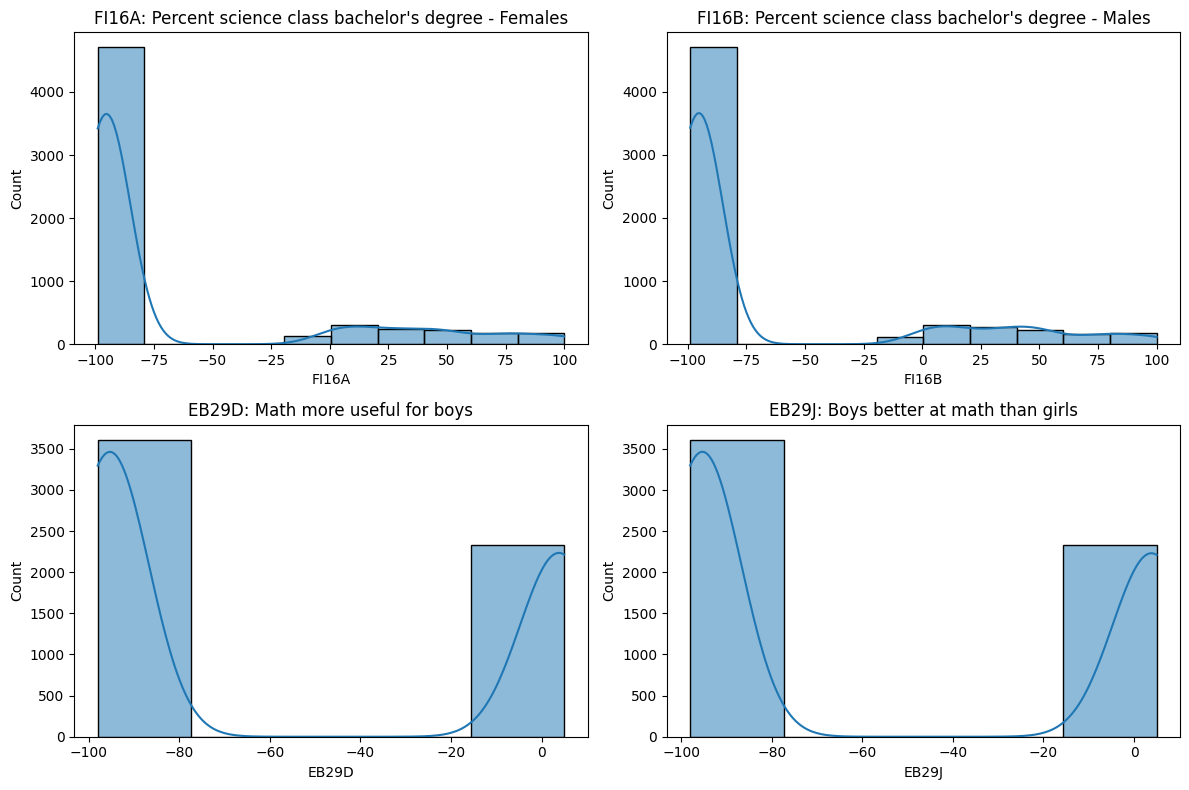

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and axes
plt.figure(figsize=(12, 8))

# Plot histograms
plt.subplot(2, 2, 1)
sns.histplot(variables_subset['FI16A'], bins=10, kde=True)
plt.title('FI16A: Percent science class bachelor\'s degree - Females')

plt.subplot(2, 2, 2)
sns.histplot(variables_subset['FI16B'], bins=10, kde=True)
plt.title('FI16B: Percent science class bachelor\'s degree - Males')

plt.subplot(2, 2, 3)
sns.histplot(variables_subset['EB29D'], bins=5, kde=True)
plt.title('EB29D: Math more useful for boys')

plt.subplot(2, 2, 4)
sns.histplot(variables_subset['EB29J'], bins=5, kde=True)
plt.title('EB29J: Boys better at math than girls')

plt.tight_layout()
plt.show()


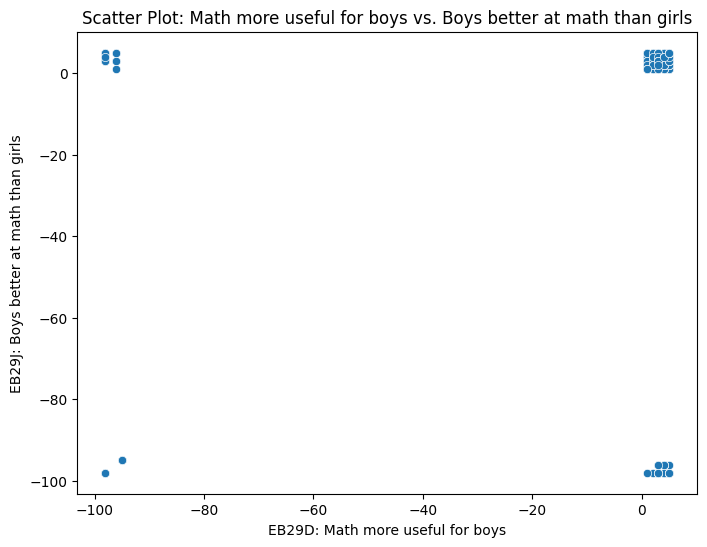

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='EB29D', y='EB29J', data=variables_subset)
plt.title('Scatter Plot: Math more useful for boys vs. Boys better at math than girls')
plt.xlabel('EB29D: Math more useful for boys')
plt.ylabel('EB29J: Boys better at math than girls')
plt.show()


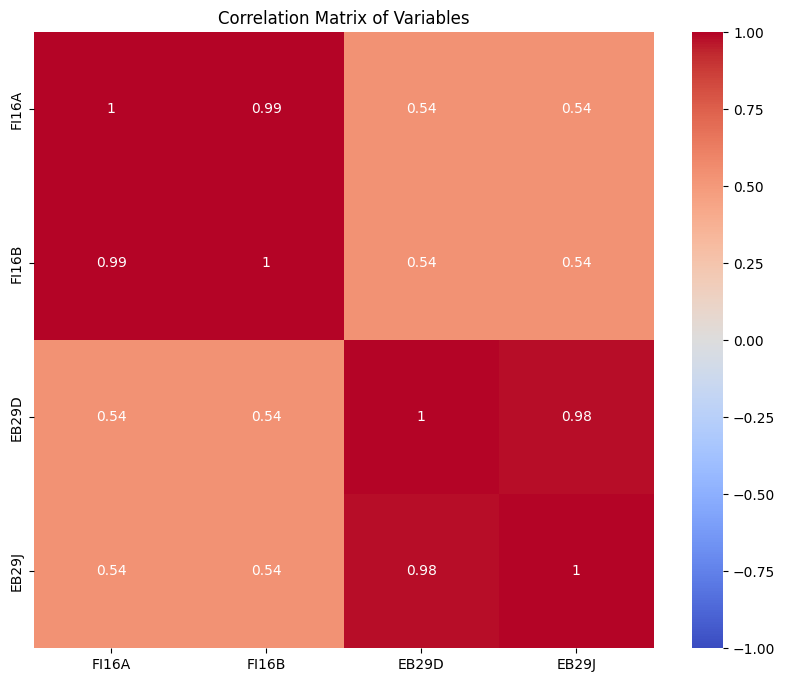

In [78]:
# Compute the correlation matrix
corr = variables_subset.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Variables')
plt.show()


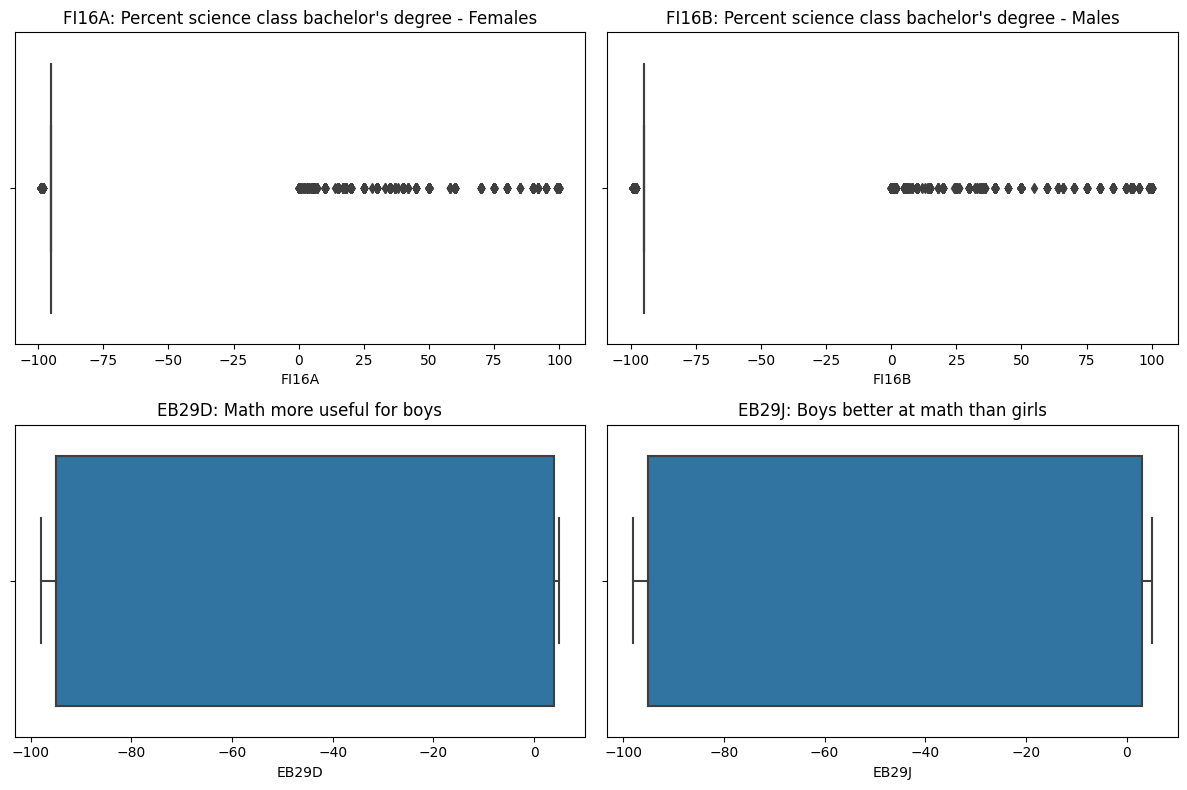

In [79]:
plt.figure(figsize=(12, 8))

# Box plots
plt.subplot(2, 2, 1)
sns.boxplot(x=variables_subset['FI16A'])
plt.title('FI16A: Percent science class bachelor\'s degree - Females')

plt.subplot(2, 2, 2)
sns.boxplot(x=variables_subset['FI16B'])
plt.title('FI16B: Percent science class bachelor\'s degree - Males')

plt.subplot(2, 2, 3)
sns.boxplot(x=variables_subset['EB29D'])
plt.title('EB29D: Math more useful for boys')

plt.subplot(2, 2, 4)
sns.boxplot(x=variables_subset['EB29J'])
plt.title('EB29J: Boys better at math than girls')

plt.tight_layout()
plt.show()
